In [1]:
import sys
sys.path.insert(1, '../')
from OUvAAxelrod import fourier_analysis, compare_homo_hetero, fourier_instability
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft
import math
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
df_1 = pd.read_csv("Data/data_seed4_mm1000_me01_mi01_sdm2000_sde0_sdi0.csv")
df_2 = pd.read_csv("Data/data_seed8_mm1000_me01_mi01_sdm2000_sde0_sdi0.csv")
df_3 = pd.read_csv("Data/data_seed16_mm1000_me01_mi01_sdm2000_sde0_sdi0.csv")
df_4 = pd.read_csv("Data/data_seed32_mm1000_me01_mi01_sdm2000_sde0_sdi0.csv")
df_5 = pd.read_csv("Data/data_seed64_mm1000_me01_mi01_sdm2000_sde0_sdi0.csv")
df_6 = pd.read_csv("Data/data_seed128_mm1000_me01_mi01_sdm2000_sde0_sdi0.csv")
df_7 = pd.read_csv("Data/data_seed256_mm1000_me01_mi01_sdm2000_sde0_sdi0.csv")
df_8 = pd.read_csv("Data/data_seed512_mm1000_me01_mi01_sdm2000_sde0_sdi0.csv")
df_9 = pd.read_csv("Data/data_seed1024_mm1000_me01_mi01_sdm2000_sde0_sdi0.csv")
df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9], axis = 1)
df

,Seed 4,Seed 8,Seed 16,Seed 32,Seed 64,Seed 128,Seed 256,Seed 512,Seed 1024
0,0.775,0.774,0.774,0.671,0.738,0.749,0.719,0.738,0.701
1,0.688,0.689,0.674,0.546,0.629,0.628,0.596,0.618,0.588
2,0.676,0.675,0.657,0.546,0.624,0.622,0.591,0.601,0.581
3,0.664,0.676,0.656,0.537,0.621,0.620,0.589,0.594,0.570
4,0.658,0.676,0.650,0.543,0.619,0.615,0.586,0.587,0.574
5,0.658,0.677,0.648,0.532,0.617,0.617,0.585,0.586,0.584
6,0.655,0.672,0.651,0.528,0.609,0.605,0.581,0.591,0.572
7,0.647,0.676,0.646,0.529,0.607,0.607,0.573,0.591,0.570
8,0.645,0.673,0.649,0.519,0.599,0.600,0.561,0.590,0.577
9,0.649,0.678,0.652,0.504,0.602,0.593,0.565,0.592,0.585


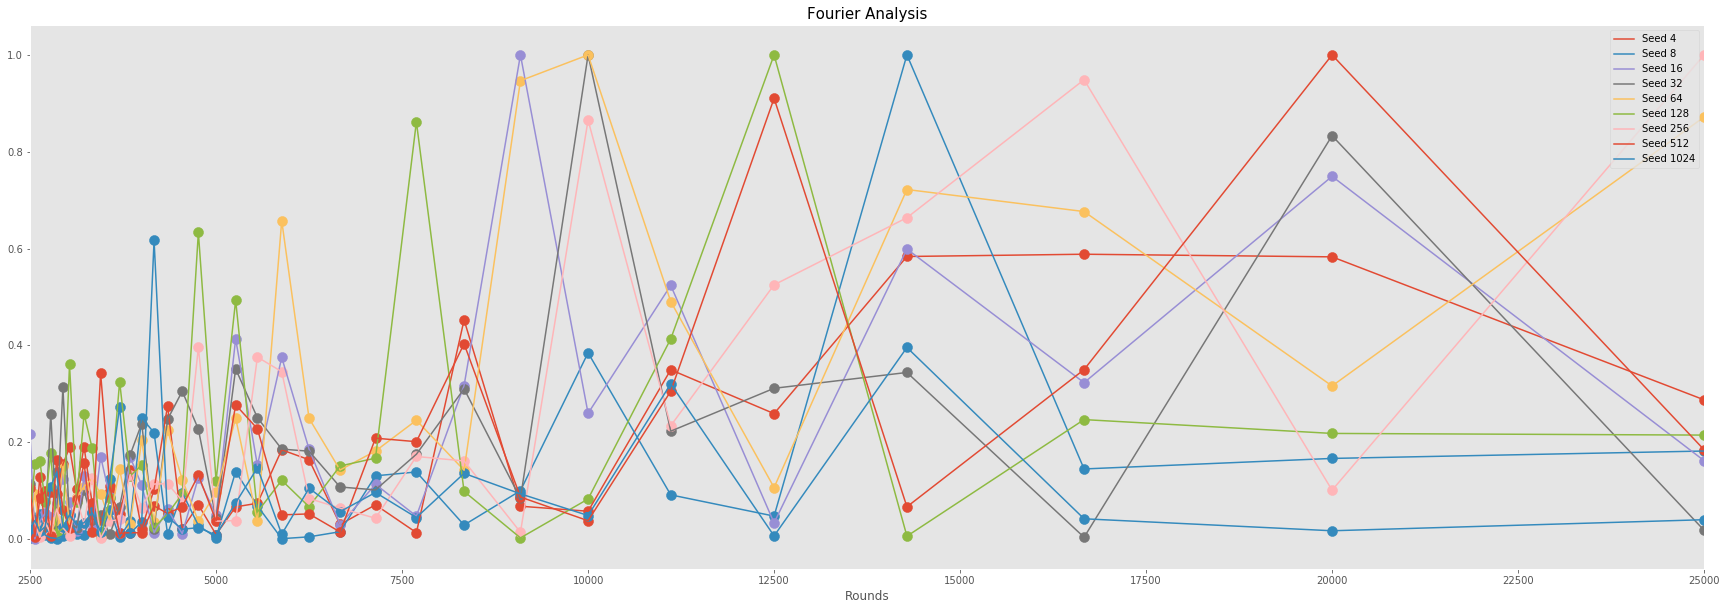

In [3]:
fourier_analysis(df, fig_style='ggplot', x_lim=(2500,25000))

In [4]:
a = fourier_instability([df[column] for column in df], np.arange(4,11))

In [5]:
a.to_csv("fourier_instability_SDM.csv", index = False)